In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Lymphoma-P1.csv')

In [3]:
df.head(10)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT03415399,Clinical Study of ET190L1 ARTEMIS™ in Relapsed...,NaN,Completed,No Results Available,"Lymphoma, B-Cell",Biological: ET190L1 ARTEMIS™ T cells,Maximum Tolerated Dose|Toxicity profile of ET1...,Eureka Therapeutics Inc.|Peking University,...,ETCH17CD19AR103,"September 9, 2017","December 31, 2020","December 31, 2020","January 30, 2018",NaN,"March 16, 2021","Peking University Cancer Hospital, Beijing, China",NaN,https://ClinicalTrials.gov/show/NCT03415399
1,2,NCT01334502,"Everolimus, Rituximab, and Combination Chemoth...",NaN,Completed,No Results Available,Lymphoma,Biological: rituximab|Drug: cyclophosphamide|D...,MTD of everolimus in combination with R-CHOP|A...,Alliance for Clinical Trials in Oncology|Natio...,...,NCCTG-N1085|CDR0000698584|NCI-2011-02643,March 2012,February 2015,August 2017,"April 13, 2011",NaN,"August 10, 2017","Mayo Clinic Cancer Center, Rochester, Minnesot...",NaN,https://ClinicalTrials.gov/show/NCT01334502
2,3,NCT03039114,Study Evaluating Safety and Efficacy of INCB05...,NaN,Completed,No Results Available,Lymphoma,Drug: Parsaclisib|Drug: Hexal|Drug: Gazyvaro,Safety and tolerability of parsaclisib in comb...,Incyte Corporation,...,INCB 50465-102 (CITADEL-102)|Parsaclisib,"February 15, 2017","March 30, 2021","March 30, 2021","February 1, 2017",NaN,"December 2, 2021","Banner Health, Gilbert, Arizona, United States...",NaN,https://ClinicalTrials.gov/show/NCT03039114
3,4,NCT04103905,A Study of MIL62 in Treatment of CD20 Positive...,NaN,Completed,No Results Available,CD20-positive B Cell Non-Hodgkin Lymphoma,Drug: Recombinant Humanized Monoclonal Antibod...,Percentage of Participants Who Experienced a D...,"Beijing Mabworks Biotech Co., Ltd.",...,MIL62-CT01,"February 10, 2017","May 30, 2019","May 29, 2020","September 26, 2019",NaN,"June 16, 2021",Chinese Academy of Medical Sciences (CAMS) & P...,NaN,https://ClinicalTrials.gov/show/NCT04103905
4,5,NCT02741388,A Phase Ib Study of Oral Selinexor in Adult Pa...,SELINDA,Completed,No Results Available,B-cell Lymphoma,Drug: selinexor|Drug: Rituximab|Drug: Dexameth...,Incidence rate of dose-limiting toxicities (DL...,The Lymphoma Academic Research Organisation|Ka...,...,SELINDA,October 2016,"September 29, 2021","September 29, 2021","April 18, 2016",NaN,"December 7, 2021","Institut Jules Bordet, Bruxelles, Belgium|CHU ...",NaN,https://ClinicalTrials.gov/show/NCT02741388
5,6,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,NaN,Completed,No Results Available,B-Cell Lymphoma,Drug: CPI-1205,Frequency of Dose-limiting toxicities (DLTs)|F...,Constellation Pharmaceuticals,...,1205-01,March 2015,December 2018,December 2018,"March 23, 2015",NaN,"May 18, 2022","Horizon Oncology Center, Lafayette, Indiana, U...",NaN,https://ClinicalTrials.gov/show/NCT02395601
6,7,NCT02598570,Study Evaluating Duvelisib in Japanese Subject...,NaN,Completed,No Results Available,Lymphoma,Drug: duvelisib,Number of participants reporting Treatment-eme...,"AbbVie|Infinity Pharmaceuticals, Inc.",...,M15-460,November 2015,December 2016,February 2017,"November 6, 2015",NaN,"February 6, 2017","Site Reference ID/Investigator# 141826, Aichi,...",NaN,https://ClinicalTrials.gov/show/NCT02598570
7,8,NCT01926665,Carfilzomib Consolidation Therapy After Autolo...,NaN,Completed,No Results Available,Lymphoma,Drug: Carfilzomib|Drug: Dexamethasone,Maximum Tolerated Dose (MTD) of Carfilzomib (C...,M.D. Anderson Cancer Center|Amgen,...,2012-1070|NCI-2014-00994,"June 17, 2014","September 17, 2017","September 17, 2017","August 21, 2013",NaN,"September 19, 2017","University of Texas MD Anderson Cancer Center,...",NaN,https://ClinicalTrials.gov/show/NCT01926665
8,9,NCT00787969,"Rituximab, Cladribine, and Temsirolimus in Tre...",NaN,Completed,N

In [4]:
for col_name in ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']:
    df[col_name] = df[col_name].apply(pd.to_datetime)
df['duration'] = (df['Completion Date'] - df['Start Date']).dt.days

In [5]:
df.head(10)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,duration
0,1,NCT03415399,Clinical Study of ET190L1 ARTEMIS™ in Relapsed...,NaN,Completed,No Results Available,"Lymphoma, B-Cell",Biological: ET190L1 ARTEMIS™ T cells,Maximum Tolerated Dose|Toxicity profile of ET1...,Eureka Therapeutics Inc.|Peking University,...,2017-09-09,2020-12-31,2020-12-31,2018-01-30,NaN,2021-03-16,"Peking University Cancer Hospital, Beijing, China",NaN,https://ClinicalTrials.gov/show/NCT03415399,1209.0
1,2,NCT01334502,"Everolimus, Rituximab, and Combination Chemoth...",NaN,Completed,No Results Available,Lymphoma,Biological: rituximab|Drug: cyclophosphamide|D...,MTD of everolimus in combination with R-CHOP|A...,Alliance for Clinical Trials in Oncology|Natio...,...,2012-03-01,2015-02-01,2017-08-01,2011-04-13,NaN,2017-08-10,"Mayo Clinic Cancer Center, Rochester, Minnesot...",NaN,https://ClinicalTrials.gov/show/NCT01334502,1979.0
2,3,NCT03039114,Study Evaluating Safety and Efficacy of INCB05...,NaN,Completed,No Results Available,Lymphoma,Drug: Parsaclisib|Drug: Hexal|Drug: Gazyvaro,Safety and tolerability of parsaclisib in comb...,Incyte Corporation,...,2017-02-15,2021-03-30,2021-03-30,2017-02-01,NaN,2021-12-02,"Banner Health, Gilbert, Arizona, United States...",NaN,https://ClinicalTrials.gov/show/NCT03039114,1504.0
3,4,NCT04103905,A Study of MIL62 in Treatment of CD20 Positive...,NaN,Completed,No Results Available,CD20-positive B Cell Non-Hodgkin Lymphoma,Drug: Recombinant Humanized Monoclonal Antibod...,Percentage of Participants Who Experienced a D...,"Beijing Mabworks Biotech Co., Ltd.",...,2017-02-10,2019-05-30,2020-05-29,2019-09-26,NaN,2021-06-16,Chinese Academy of Medical Sciences (CAMS) & P...,NaN,https://ClinicalTrials.gov/show/NCT04103905,1204.0
4,5,NCT02741388,A Phase Ib Study of Oral Selinexor in Adult Pa...,SELINDA,Completed,No Results Available,B-cell Lymphoma,Drug: selinexor|Drug: Rituximab|Drug: Dexameth...,Incidence rate of dose-limiting toxicities (DL...,The Lymphoma Academic Research Organisation|Ka...,...,2016-10-01,2021-09-29,2021-09-29,2016-04-18,NaN,2021-12-07,"Institut Jules Bordet, Bruxelles, Belgium|CHU ...",NaN,https://ClinicalTrials.gov/show/NCT02741388,1824.0
5,6,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,NaN,Completed,No Results Available,B-Cell Lymphoma,Drug: CPI-1205,Frequency of Dose-limiting toxicities (DLTs)|F...,Constellation Pharmaceuticals,...,2015-03-01,2018-12-01,2018-12-01,2015-03-23,NaN,2022-05-18,"Horizon Oncology Center, Lafayette, Indiana, U...",NaN,https://ClinicalTrials.gov/show/NCT02395601,1371.0
6,7,NCT02598570,Study Evaluating Duvelisib in Japanese Subject...,NaN,Completed,No Results Available,Lymphoma,Drug: duvelisib,Number of participants reporting Treatment-eme...,"AbbVie|Infinity Pharmaceuticals, Inc.",...,2015-11-01,2016-12-01,2017-02-01,2015-11-06,NaN,2017-02-06,"Site Reference ID/Investigator# 141826, Aichi,...",NaN,https://ClinicalTrials.gov/show/NCT02598570,458.0
7,8,NCT01926665,Carfilzomib Consolidation Therapy After Autolo...,NaN,Completed,No Results Available,Lymphoma,Drug: Carfilzomib|Drug: Dexamethasone,Maximum Tolerated Dose (MTD) of Carfilzomib (C...,M.D. Anderson Cancer Center|Amgen,...,2014-06-17,2017-09-17,2017-09-17,2013-08-21,NaN,2017-09-19,"University of Texas MD Anderson Cancer Center,...",NaN,https://ClinicalTrials.gov/show/NCT01926665,1188.0
8,9,NCT00787969,"Rituximab, Cladribine, and Temsirolimus in Tre...",NaN,Completed,No Results Available,Lymphoma,Biological: rituximab|Drug: cladribine|Drug: t...,Number of dose limiting toxicity incidents as ...,Alliance for Clinical Trials in Oncology|Natio...,...,2009-04-01,2012-04-01,2017-06-15,2008-11-10,NaN,2018-01-09,"Mayo Clinic Scottsdale, Scottsdale, Arizona, U...",NaN,https://ClinicalTrials.gov/show/NCT00787969,2997.0
9

In [6]:
# Remove invalid rows
df = df[~df.duration.isna()]


df = df.drop(['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted'], axis=1)

#df.duration = df.duration.astype(int)
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [7]:
df.head(1).transpose()

,0
rank,1
nct_number,NCT03415399
title,Clinical Study of ET190L1 ARTEMIS™ in Relapsed...
acronym,NaN
status,Completed
study_results,No Results Available
conditions,"Lymphoma, B-Cell"
interventions,Biological: ET190L1 ARTEMIS™ T cells
outcome_measures,Maximum Tolerated Dose|Toxicity profile of ET1...
sponsor/collaborators,Eureka Therapeutics Inc.|Peking University


In [8]:
import re
from collections import defaultdict
# Transfor string to class
class_mapping = {}
#col_names = ['Study Results']
#for col_name in col_names:
#    all[col_name].value_counts().head(10).index.tolist()
measure_count = {}
synonymous = {}
processed_measure = {}
invalid_row_ids = []
print(df.shape)
df = df[df['outcome_measures'].apply(lambda x: type(x)==str)]
print(df.shape)
skip_words = ['Phase I', 'Phase II']
for measures in df.outcome_measures:
    new_measures = []
    for measure in measures.split('|'):
        #if "overall survival" in measure.lower():
        #    print(measure)
        pattern = r"\((.*?)\)"
        matches = re.findall(pattern, measure)
        
        for w in skip_words:
            if w in matches:
                matches.remove(w)
        
        measure = re.sub(r"\([^()]*\)", "", measure)
        measure = measure.strip()
        measure = measure.lower()
        #if "overall survival" in measure.lower():
        #    print(matches)
        if matches:
            synonymous[measure] = matches[-1]
                
        if measure not in measure_count:
            measure_count[measure] = 1
        else:
            measure_count[measure] += 1
        new_measures.append(measure)
    processed_measure[measures] = new_measures

sorted_measure_count = sorted(measure_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_measure_count[:10])
# print(synonymous)


(1089, 23)
(995, 23)
[('overall survival', 111), ('duration of response', 74), ('progression-free survival', 71), ('maximum tolerated dose', 69), ('overall response rate', 67), ('progression free survival', 54), ('objective response rate', 33), ('time to progression', 21), ('pharmacokinetics', 19), ('response rate', 18)]


In [9]:
# merge similar measures
import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

n_measure = len(measure_count)
print(n_measure)
merged_measure_count = {}


# Union Find to group measures

class DSU:
    def __init__(self):
        self.par = {x: x for x in synonymous.values()}
        self.par.update({x: synonymous.get(x, x) for x in measure_count})

    def find(self, x):
        if self.par[x] != x:
            self.par[x] = self.find(self.par[x])
        return self.par[x]

    def union(self, x, y):
        if self.find(x) == self.find(y):
            return False
        else:
            self.par[self.find(x)] = self.find(y)
            return True

dsu = DSU()
print(synonymous['overall survival'])
for i in range(100):
    #if i% 10==0:
    #    print(i)
    print(i)
    for j in range(i+1, 100):
        m1, v1 = sorted_measure_count[i]
        m2, v2 = sorted_measure_count[j]
        doc1 = nlp(m1)
        doc2 = nlp(m2)

        # Compute the similarity between the two sentences
        #if fuzz.token_sort_ratio(dsu.find(m1), dsu.find(m2))>=80:
        # dsu.find(m1) not in synonymous.values() and dsu.find(m2) not in synonymous.values() and 
        if doc1.similarity(doc2) > 0.8:
            if m1 == 'overall survival' or m2 == 'overall survival':
                print(m1, m2)
                dsu.union(m2, m1)

for x in dsu.par:
    dsu.par[x] = dsu.find(x)
for x, _ in sorted_measure_count:
    par = dsu.par[x]
    if par not in merged_measure_count:
        merged_measure_count[dsu.par[x]] = measure_count[x]
    else:
        merged_measure_count[dsu.par[x]] += measure_count[x]
print(sorted(merged_measure_count.items(), key=lambda x: x[1], reverse=True)[:10])

5511
OS
0


/tmp/ipykernel_282767/2256703931.py:46: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if doc1.similarity(doc2) > 0.8:


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[('PFS', 187), ('MTD', 173), ('Cmax', 162), ('OS', 152), ('DOR', 108), ('DLT', 95), ('AEs', 88), ('Tmax', 88), ('ORR', 87), ('DLTs', 87)]


In [10]:
dsu.par['complete response rate']
merged_measure_count['CRR']

17

In [11]:
for measure_name, _ in sorted(merged_measure_count.items(), key=lambda x: x[1], reverse=True)[:10]:
    df[f"measure_{measure_name}"] = df.outcome_measures.apply(lambda x: any(dsu.par[m.lower()]==measure_name for m in processed_measure[x]))
df[f"number_of_measures"] = df.outcome_measures.apply(lambda x: len(x.split("|")))

In [12]:
print(df.outcome_measures[0])
df.head(1).transpose()

Maximum Tolerated Dose|Toxicity profile of ET190L1 ARTEMIS™ T-cell treatment|Tmax of serum cytokine levels|Time to baseline for serum cytokine levels|AUC of serum cytokine levels|Duration of in vivo engraftment of ET190L1 ARTEMIS™ T cells|Rate of disease response|Anti-tumor responses|B cell depletion


,0
rank,1
nct_number,NCT03415399
title,Clinical Study of ET190L1 ARTEMIS™ in Relapsed...
acronym,NaN
status,Completed
study_results,No Results Available
conditions,"Lymphoma, B-Cell"
interventions,Biological: ET190L1 ARTEMIS™ T cells
outcome_measures,Maximum Tolerated Dose|Toxicity profile of ET1...
sponsor/collaborators,Eureka Therapeutics Inc.|Peking University


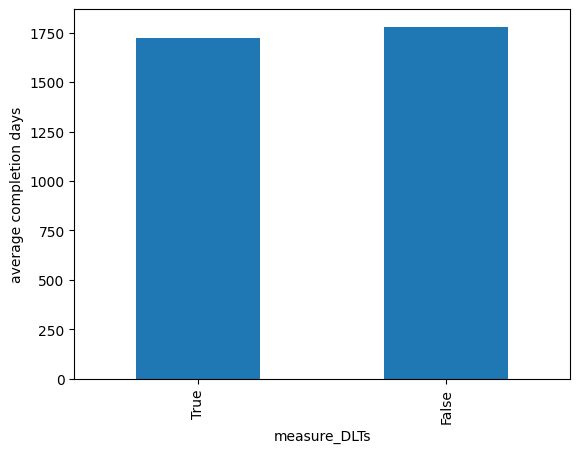

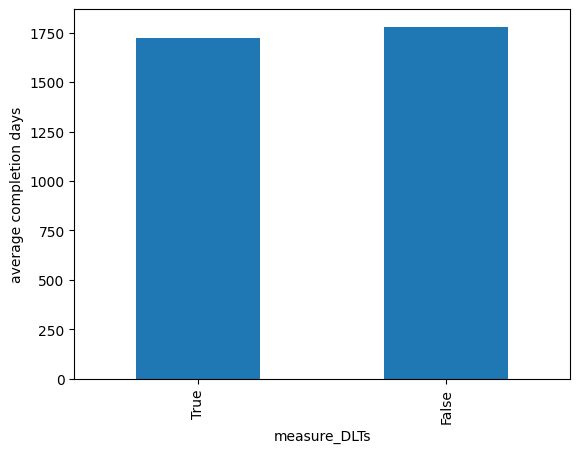

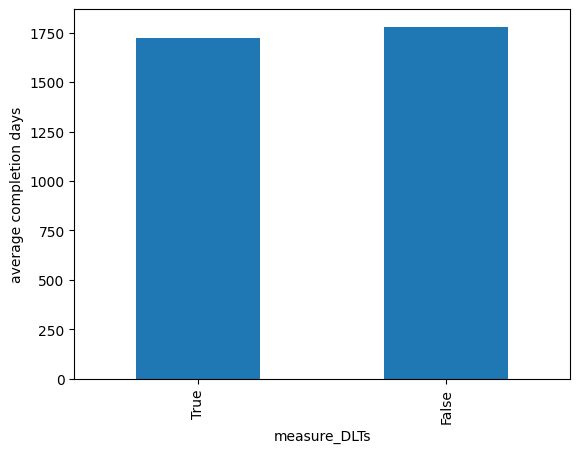

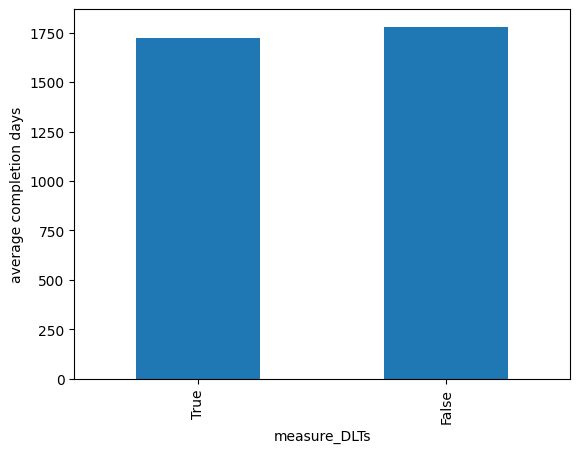

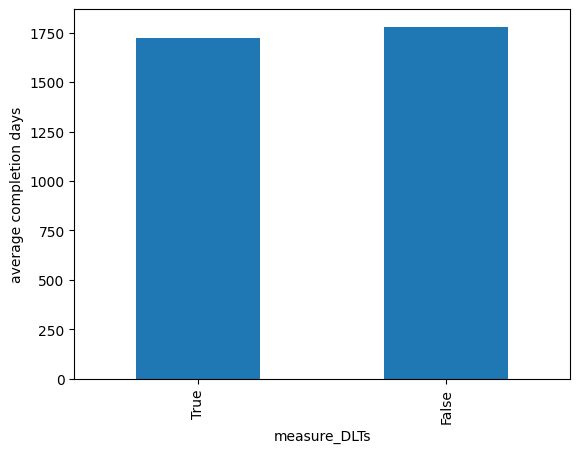

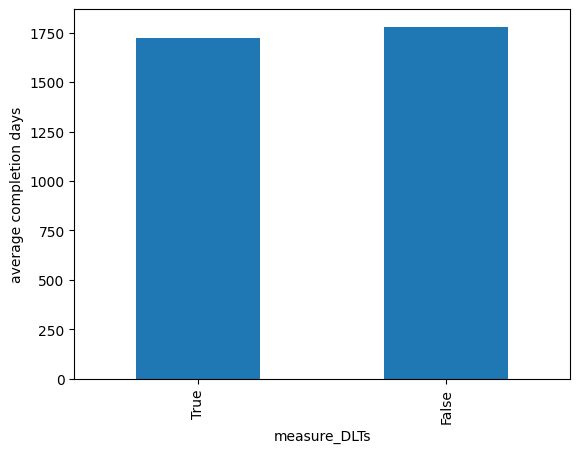

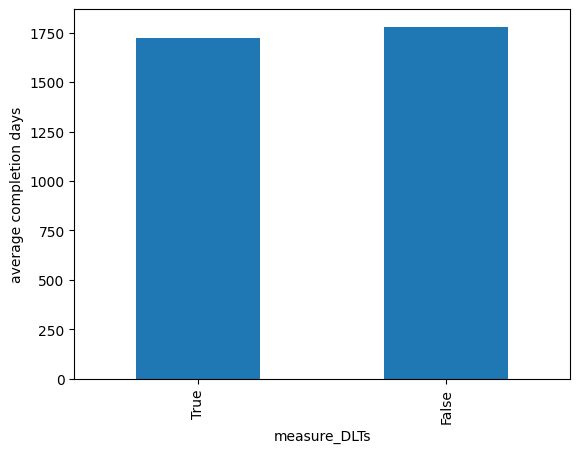

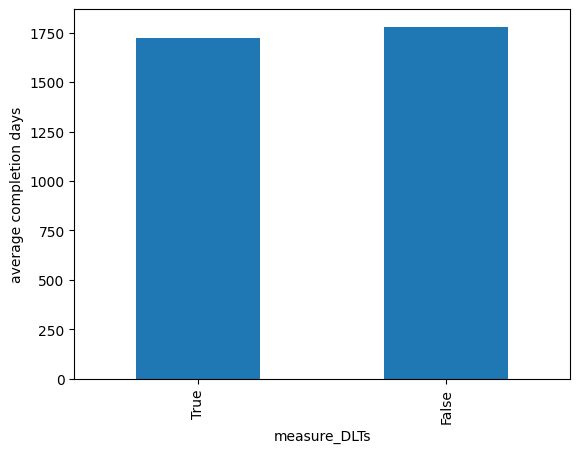

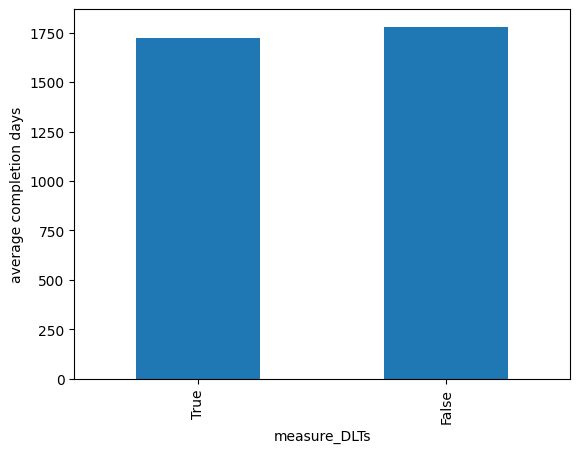

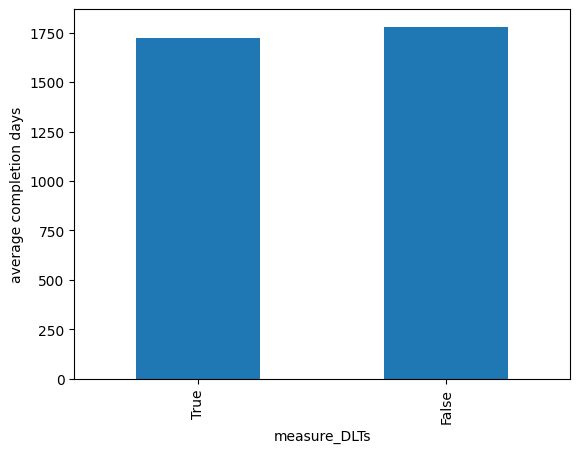

In [19]:
import matplotlib.pyplot as plt

for col in df.columns:
    if col.startswith("measure_"):
        df.groupby(f"measure_{measure_name}")['duration'].mean().sort_values().plot(kind = 'bar')
        plt.ylabel('average completion days')
        plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['duration'],axis=1), df['duration'], 
                                                    test_size=0.33, random_state=42,)

In [ ]:
X_train.head(2)
X_test.head(2)
y_train.head(2)
y_test.head(2)

In [ ]:
y_test

In [ ]:
gbm = lgb.LGBMRegressor(n_estimators=200,)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2')